In [0]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_yhhx1Xs.zip

--2020-04-04 17:33:17--  https://datahack-prod.s3.amazonaws.com/train_file/train_yhhx1Xs.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.108
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5482216 (5.2M) [application/zip]
Saving to: ‘train_yhhx1Xs.zip’

train_yhhx1Xs.zip   100%[===================>]   5.23M  2.86MB/s    in 1.8s    

2020-04-04 17:33:20 (2.86 MB/s) - ‘train_yhhx1Xs.zip’ saved [5482216/5482216]



In [0]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_QkPvNLx.csv

--2020-04-04 17:32:31--  https://datahack-prod.s3.amazonaws.com/test_file/test_QkPvNLx.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.96
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1932411 (1.8M) [text/csv]
Saving to: ‘test_QkPvNLx.csv’

test_QkPvNLx.csv    100%[===================>]   1.84M  1.14MB/s    in 1.6s    

2020-04-04 17:32:34 (1.14 MB/s) - ‘test_QkPvNLx.csv’ saved [1932411/1932411]



In [0]:
!unzip train_yhhx1Xs.zip

Archive:  train_yhhx1Xs.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_QkPvNLx.csv')

In [0]:
train.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [0]:
test.head(7)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,User_Traffic
0,883,883,1,Development,Course,1,0,1,0.007,15375.101198
1,884,884,1,Development,Course,1,0,1,0.007,15375.101198
2,885,885,1,Development,Course,1,0,1,0.007,15375.101198
3,886,886,1,Development,Course,1,0,1,0.007,15375.101198
4,887,887,1,Development,Course,0,0,1,0.007,15375.101198
5,888,888,1,Development,Course,0,0,1,0.007,15375.101198
6,889,889,1,Development,Course,0,0,1,0.007,15375.101198


In [0]:
d=train['User_Traffic'].mean()

In [0]:
test['User_Traffic']=e

In [0]:
train.isnull().sum(),test.isnull().sum()

(ID                       0
 Day_No                   0
 Course_ID                0
 Course_Domain            0
 Course_Type              0
 Short_Promotion          0
 Public_Holiday           0
 Long_Promotion           0
 User_Traffic             0
 Competition_Metric    1764
 Sales                    0
 dtype: int64, ID                      0
 Day_No                  0
 Course_ID               0
 Course_Domain           0
 Course_Type             0
 Short_Promotion         0
 Public_Holiday          0
 Long_Promotion          0
 Competition_Metric    120
 User_Traffic            0
 dtype: int64)

In [0]:
train.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [0]:

mean = train['Competition_Metric'].mean()
train['Competition_Metric'].fillna(mean, inplace=True)
mean = test['Competition_Metric'].mean()
test['Competition_Metric'].fillna(mean, inplace=True)

In [0]:
loc = np.append(train['Course_Domain'].values, test['Course_Domain'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['Course_Domain']=l.transform(train['Course_Domain'])
test['Course_Domain']=l.transform(test['Course_Domain'])

In [0]:
loc = np.append(train['Course_Type'].values, test['Course_Type'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['Course_Type']=l.transform(train['Course_Type'])
test['Course_Type']=l.transform(test['Course_Type'])

In [0]:
train_df=train
test_df=test

In [0]:
del train_df['User_Traffic']

In [0]:
X = train_df.drop(labels=['Sales'], axis=1)
y = train_df['Sales'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [0]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((384065, 9), (384065,), (128022, 9), (128022,))

In [0]:
from math import sqrt 
from sklearn.metrics import mean_squared_error

In [0]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 1000,
         'num_leaves': 80,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 1000,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 1000 rounds.
[100]	valid_0's rmse: 24.2657
[200]	valid_0's rmse: 22.2751
[300]	valid_0's rmse: 21.673
[400]	valid_0's rmse: 21.4267
[500]	valid_0's rmse: 21.2837
[600]	valid_0's rmse: 21.1882
[700]	valid_0's rmse: 21.128
[800]	valid_0's rmse: 21.1017
[900]	valid_0's rmse: 21.0932
[1000]	valid_0's rmse: 21.102
Did not meet early stopping. Best iteration is:
[892]	valid_0's rmse: 21.0908
RMSLE: inf


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


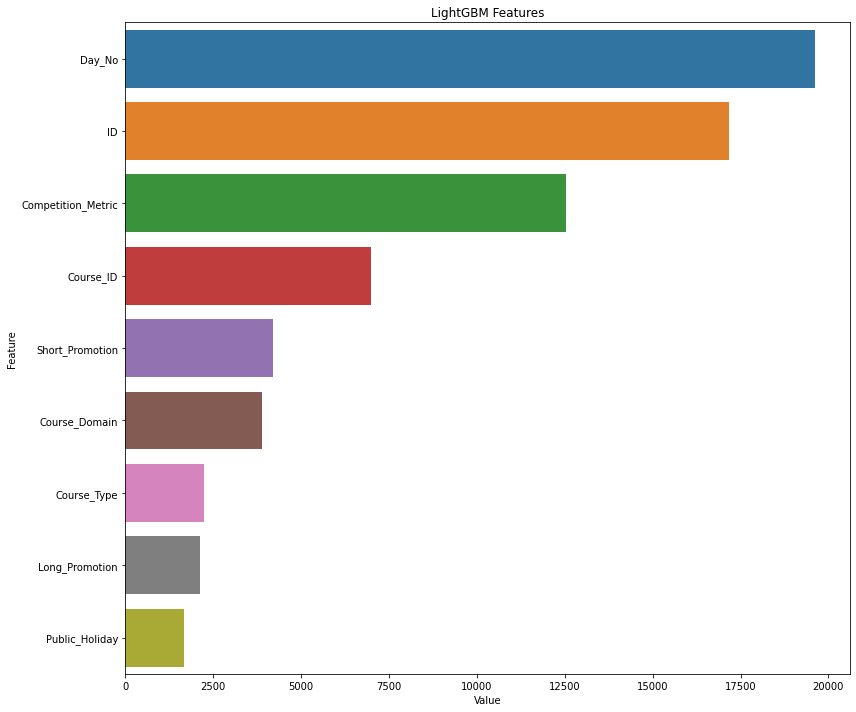

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test_df

In [0]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  20.81994390079879


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  21.400152387514495


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  21.205798871895787


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  21.076621456162126


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  20.92802482300659


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  21.24361412625193


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  21.102294247888157


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  20.606117077316185


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  21.326546463035374


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  20.982506071179813


In [0]:
np.mean(errlgb,0)

21.069161942504927

In [0]:
lgbm_final = np.mean(y_pred_totgb,0)
lgbm_final

array([144.90715752, 144.90715752, 144.90715752, ..., 174.55960006,
       174.55960006, 174.55960006])

In [0]:
lgbm_final.max()

419.19513692915154

In [0]:
submission = pd.DataFrame({
        "ID": test["ID"],
        "Sales":lgbm_final
    })
submission.to_csv('./test_coder.csv', index=False)
print(submission)

           ID       Sales
0         883  144.907158
1         884  144.907158
2         885  144.907158
3         886  144.907158
4         887   92.335869
...       ...         ...
35995  548083  174.559600
35996  548084  174.559600
35997  548085  174.559600
35998  548086  174.559600
35999  548087  174.559600

[36000 rows x 2 columns]


In [0]:
from google.colab import files
files.download('test_coder.csv')